In [75]:
def hash1(word): 
    res = 1;
    for i in word:
        res *= (ord(i) - 12)
    return res;

def hash2(word): 
    res = 0
    for i in word:
        res = 29 * res + ord(i) - 12
    return res;

In [76]:
class Car:

    def __init__(self, raw): #конструктор
        self.name = raw[0]
        self.model = raw[1]
        self.year = raw[2]
        self.number = raw[3]
        self.color = raw[4]
        self.hash1 = hash1(self.number)
        self.hash2 = hash2(self.number)
        
    def __eq__(self, other): #x = y
        if self.number == other.number:
            if self.year == other.year:
                if self.model == other.model:
                    if self.color == other.color:
                        if self.name == other.name:
                            return True
        return False
    
    def __ne__(self, other): #x != y
        if self == other:
            return False
        else:
            return True
        
    def __lt__(self, other): #x < y
        if self.number < other.number:
            return True
        elif self.number == other.number:
            if self.year < other.year:
                return True
            elif self.year == other.year:
                if self.model < other.model:
                    return True
                elif self.model == other.model:
                    if self.color < other.color:
                        return True
                    elif self.color == other.color:
                        if self.name < other.name:
                            return True
        return False
    
    def __gt__(self, other): #x > y
        if self.number > other.number:
            return True
        elif self.number == other.number:
            if self.year > other.year:
                return True
            elif self.year == other.year:
                if self.model > other.model:
                    return True
                elif self.model == other.model:
                    if self.color > other.color:
                        return True
                    elif self.color == other.color:
                        if self.name > other.name:
                            return True
        return False
    
    def __le__(self, other): #x <= y
        if (self < other) or (self == other):
            return True
        else:
            return False
        
    def __ge__(self, other): #x >= y
        if (self > other) or (self == other):
            return True
        else:
            return False

In [62]:
import pandas as pd
from time import time
import random
import matplotlib.pyplot as plt

In [10]:
n = [100, 500, 1000, 5000, 10000, 50000, 100000]

In [12]:
def read_table(n):
    table = pd.read_csv('car' + str(n) + '.csv')
    mas = []
    for i in range(0, n):
        elem = Car(table.iloc[i])
        mas.append(elem)
    return mas

In [77]:
def hash_tables1(lst):
    collision = 0
    hash_table = {}
    for i in lst:
        available_hash = hash_table.keys() 
        if i.hash1 in available_hash:
            collision += 1
            hash_table[i.hash1].append(i)
        else:
            more_elements = [i]
            hash_table[i.hash1] = more_elements

In [78]:
def hash_tables2(lst):
    collision = 0
    hash_table = {}
    for i in lst:
        available_hash = hash_table.keys() 
        if i.hash2 in available_hash:
            collision += 1
            hash_table[i.hash1].append(i)
        else:
            more_elements = [i]
            hash_table[i.hash2] = more_elements  

In [79]:
def find_table1(hash_table, key):
    hash_key = hash1(key)
    available_hash = hash_table.keys()
    if hash_key in available_hash:
        for i in range(len(hash_table[hash_key])):
            if hash_table[hash_key][i].number == key:
                return hash_table[hash_key][i]   

In [80]:
def find_table2(hash_table, key):
    hash_key = hash2(key)
    available_hash = hash_table.keys()
    if hash_key in available_hash:
        for i in range(len(hash_table[hash_key])):
            if hash_table[hash_key][i].number == key:
                return hash_table[hash_key][i] 

In [54]:
def find_key(lst):
    return lst[random.randint(0, len(lst) - 1)].number, lst[random.randint(0, len(lst) - 1)].number

In [67]:
time1 = []
time2 = []
col1 = []
col2 = []
for i in n:
    mas = read_table(i)
    hash_table1, collision1 = hash_tables1(mas)
    hash_table2, collision2 = hash_tables2(mas)
    col1.append(collision1)
    col2.append(collision2)
    key1, key2 = find_key(mas)
    start1 = time()
    find_table1(hash_table1, key1)
    time1.append(time() - start1)
    start2 = time()
    find_table2(hash_table2, key2)
    time2.append(time() - start2)

In [69]:
lin = [0.0000031, 0.0000021, 0.0000031, 0.0000069, 0.0000041, 0.0000191, 0.0000069]
binar = [0.0004921, 0.0025792, 0.0047240, 0.0326829, 0.0713582, 0.5556381, 1.2414892]
binar_plus = [0.0000019, 0.0000019, 0.0000019, 0.0000021, 0.0000017, 0.0000021, 0.0000017]
slov = [0.0000007, 0.0000010, 0.0000010, 0.0000010, 0.0000021, 0.0000010, 0.0000010]

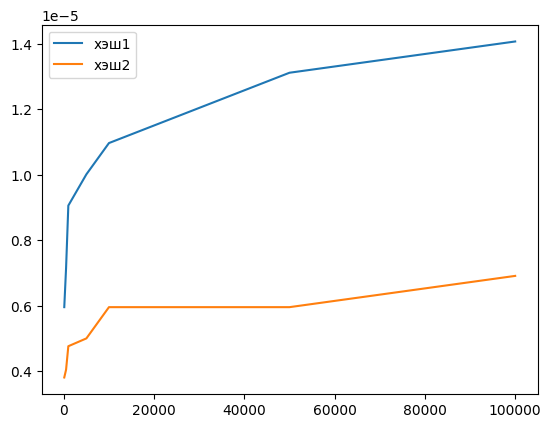

In [72]:
time_table = pd.DataFrame({'Количество элементов' : n, 'Линейный поиск' : lin, 'Бинарный поиск с сортировкой' : binar_plus, 'Бинарный поиск' : binar, 'Словарь' : slov, 'Хэш1' : time1, 'Хэш2' : time2})
time_table.to_csv('laba3time.csv', index = False)
# plt.plot(n, sorted(slov), label = 'cловарь')
# plt.plot(n, sorted(binar), label = 'бинарный поиск')
# plt.plot(n, sorted(lin), label = 'линейный поиск')
# plt.plot(n, sorted(binar_plus), label = 'бинарный поиск с сортировкой')
plt.plot(n, sorted(time1), label = 'хэш1')
plt.plot(n, sorted(time2), label = 'хэш2')
plt.legend()
plt.savefig('laba31plot.png')
plt.show()

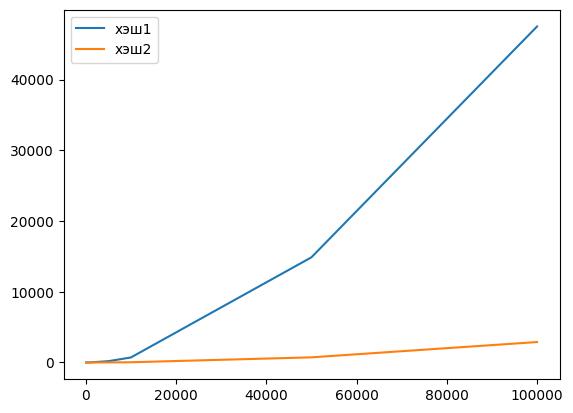

In [74]:
plt.plot(n, sorted(col1), label = 'хэш1')
plt.plot(n, sorted(col2), label = 'хэш2')
plt.legend()
plt.savefig('laba32plot.png')
plt.show()

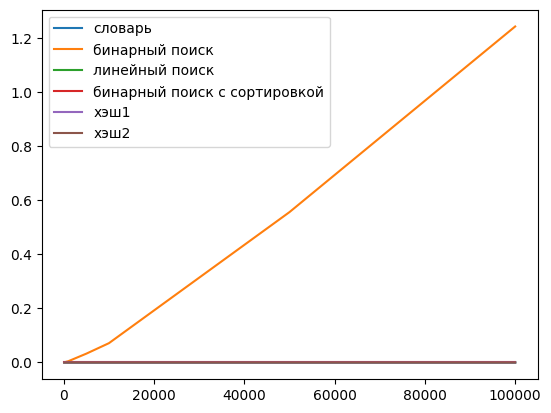

In [81]:
time_table = pd.DataFrame({'Количество элементов' : n, 'Линейный поиск' : lin, 'Бинарный поиск с сортировкой' : binar_plus, 'Бинарный поиск' : binar, 'Словарь' : slov, 'Хэш1' : time1, 'Хэш2' : time2})
time_table.to_csv('laba3time.csv', index = False)
plt.plot(n, sorted(slov), label = 'cловарь')
plt.plot(n, sorted(binar), label = 'бинарный поиск')
plt.plot(n, sorted(lin), label = 'линейный поиск')
plt.plot(n, sorted(binar_plus), label = 'бинарный поиск с сортировкой')
plt.plot(n, sorted(time1), label = 'хэш1')
plt.plot(n, sorted(time2), label = 'хэш2')
plt.legend()
plt.savefig('laba33plot.png')
plt.show()